In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

In [2]:
train_df = pd.read_csv("../../data/ag_news/train.zip",compression='zip')
test_df = pd.read_csv("../../data/ag_news/test.zip",compression='zip')
classes = ['World','Sports','Business','Sci/Tech']
train_df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [3]:
train_df['Text'] = train_df.apply(lambda x: x['Title']+' '+x['Description'],axis=1)
test_df['Text'] = test_df.apply(lambda x: x['Title']+' '+x['Description'],axis=1)

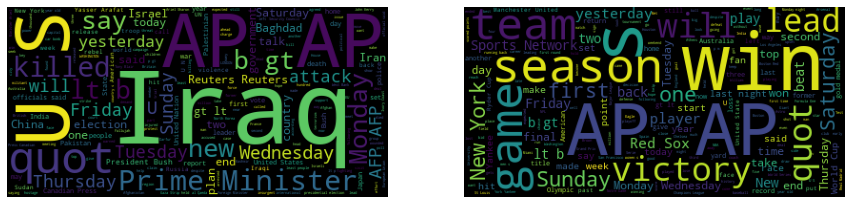

In [4]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
for i in range(2):
    text = ' '.join(train_df[train_df['Class Index']==i+1]['Text'])
    w = WordCloud().generate(text)
    ax[i].imshow(w)
    ax[i].axis('off')

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=5,max_df=0.8,max_features=10000)
train_x = cv.fit_transform(train_df['Text'])
test_x = cv.transform(test_df['Text'])
train_x.shape

(120000, 10000)

In [15]:
train_y = train_df['Class Index']
test_y = test_df['Class Index']

Acc=0.9163157894736842


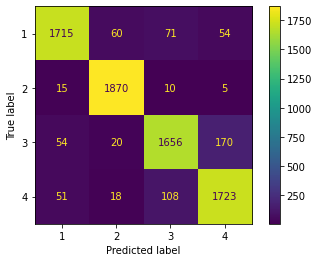

In [16]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
model = SGDClassifier().fit(train_x,train_y)
test_p = model.predict(test_x)
print(f"Acc={accuracy_score(test_y,test_p)}")
ConfusionMatrixDisplay.from_predictions(test_y,test_p)


In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_en = stopwords.words('english')
stopwords_en

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmitr\AppData\Roaming\nltk_data...


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
t = train_df.iloc[10]['Text']
t

"Oil and Economy Cloud Stocks' Outlook  NEW YORK (Reuters) - Soaring crude prices plus worries  about the economy and the outlook for earnings are expected to  hang over the stock market next week during the depth of the  summer doldrums."

In [33]:
lemmatizer = nltk.stem.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

def process(t):
    t = t.lower()
    for x in string.punctuation:
        t = t.replace(x,'')
    t = t.split()
    t = [lemmatizer.lemmatize(x) for x in t if x not in stopwords_en]
    return t

process(t)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmitr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dmitr\AppData\Roaming\nltk_data...


['oil',
 'economy',
 'cloud',
 'stock',
 'outlook',
 'new',
 'york',
 'reuters',
 'soaring',
 'crude',
 'price',
 'plus',
 'worry',
 'economy',
 'outlook',
 'earnings',
 'expected',
 'hang',
 'stock',
 'market',
 'next',
 'week',
 'depth',
 'summer',
 'doldrums']

In [22]:
from sklearn.feature_extraction.text import 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'